# Victor Manuel Gómez Espinosa
## CIMAT Unidad Monterrey
### Análisis temporal del índice de riesgo contra indicadores económicos de 2011-2020

# Librerías

In [1]:
#librerias
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
from ipywidgets import interact
from sklearn.preprocessing import StandardScaler

In [2]:
os.chdir('/content/drive/My Drive/Colab') #cambiar la ubicacion a la carpeta donde se encuentra este archivo
!ls #listar los documentos en esta ruta

 1_EstadísticasRiesgos.ipynb		  ITAER.xlsx
 2_ClustersRiesgos.ipynb		  NO.xlsx
 3_AnalisisTemporalTopicosRiesgos.ipynb   PIB.xlsx
 4_IndiceVsIndicadores.ipynb		  RiesgosLimpia.xlsx
 CE.xlsx				  Spanish
 clusters.xlsx				  SUR.xlsx
 CN.xlsx				 'word_vectors_fastTEXT (1).bin'
 General.xlsx				  word_vectors_fastTEXT.bin


# Datos

In [3]:
#leer datos
ITAER=pd.read_excel('ITAER.xlsx', index_col=0, parse_dates=True )
PIB=pd.read_excel('PIB.xlsx', index_col=0, parse_dates=True )

GENERAL=pd.read_excel('General.xlsx', index_col=0, parse_dates=True )
NO=pd.read_excel('NO.xlsx', index_col=0, parse_dates=True )
SUR=pd.read_excel('SUR.xlsx', index_col=0, parse_dates=True )
CN=pd.read_excel('CN.xlsx', index_col=0, parse_dates=True )
CE=pd.read_excel('CE.xlsx', index_col=0, parse_dates=True )


In [4]:
pib=PIB['PIB'].values
GRI=GENERAL['Index'].values
trimGr=PIB.index

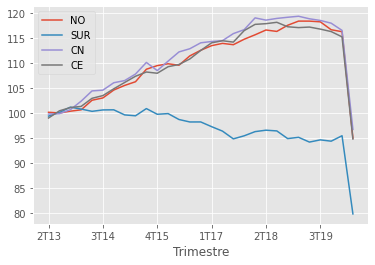

In [5]:
ITAER.plot()
plt.show()

In [6]:
itaerNO=ITAER['NO'].values
itaerSUR=ITAER['SUR'].values
itaerCN=ITAER['CN'].values
itaerCE=ITAER['CE'].values

no=NO['Index'].values
sur=SUR['Index'].values
cn=CN['Index'].values
ce=CE['Index'].values

trimiTAER=ITAER.index

In [7]:
X1=np.stack((pib,GRI),axis=-1) #pib
X2=np.stack((itaerNO,no,itaerSUR,sur,itaerCN,cn,itaerCE,ce),axis=-1) #itaer

In [8]:
newDic={'NO':X2[:,1],
        'SUR': X2[:,3],
        'CN': X2[:,5],
        'CE': X2[:,7]}

indexdf=pd.DataFrame(newDic)
indexdf.index=trimiTAER

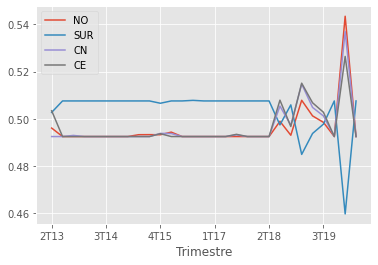

In [9]:
indexdf.plot()
plt.show()

In [12]:
#ESTANDARIZAMOS
scaler1 = StandardScaler()
X1=scaler1.fit_transform(X1) #pib
scaler2 = StandardScaler()
X2=scaler2.fit_transform(X2) #itaer

#Visualización


In [13]:
def plotTimeSeries(filter):
  if filter=='General':
      i=-1
      data1 = X1[:,0] #pib
      data2 = X1[:,1]*(-1*i) #risk idx gen
      x, y = data1, data2
      label1, label2='PIB','Index'
      time=trimGr
  else:
    if filter=='NO':
      j=0
      i=1
    elif filter=='SUR':
      j=2
      i=-1
    elif filter=='CN':
      j=4
      i=1
    elif filter=='CE':
      j=6
      i=1
    
    sign=np.sign(-1*i)
    if sign>0:
      ch=''
    else:
      ch='-'
    data1 = X2[:,j] #itaer
    data2 = X2[:,j+1] #risk idx por region *(-1*i)
    x, y = data1, data2
    label1, label2='ITAER '+filter,'Index '+filter
    time=trimiTAER




  fig=plt.figure()
  plt.figure(figsize=(15,7))
  plt.subplot(1,2,1)
  plt.plot(time, data1, label=label1,color='green')
  plt.plot(time, data2, label=label2,color='red')
  plt.axhline(y=0, color='black', linestyle='--')
  plt.xticks(rotation=90)
  plt.legend(loc="upper left")
  plt.title(label1+ ' vs '+label2)

  plt.subplot(1,2,2)
  plt.xcorr(y, x, usevlines=True, maxlags=None, normed=True, lw=2)
  plt.axhline(y=0.5, color='green', linestyle='--')
  plt.axvline(x=0, color='red', linestyle='--')
  plt.title(label1+ ' vs '+label2+' crosscorr')
  plt.grid(True)

  plt.show()



In [14]:
interact(plotTimeSeries,filter=['General','NO','SUR','CN','CE']) #tarda un poco...

interactive(children=(Dropdown(description='filter', options=('General', 'NO', 'SUR', 'CN', 'CE'), value='Gene…

<function __main__.plotTimeSeries>

Observaciones:
- General   adelantado
- NO   atrasado
- SUR  adelantado
- CN   atrasado
- CE   atrasado